In [1]:
import pandas as pd
import numpy as np

In [2]:
def df_summary(df: pd.core.frame.DataFrame):
    print("Entries:", df.shape[0], "| Fields:", df.shape[1])
    print("----------------------------------------------")
    print(df.info())
    print("----------------------------------------------")
    print(df.head())
    print(df.tail())
    print("----------------------------------------------")
    print(df.describe())
    print(df.describe(include=np.object))   
    print("----------------------------------------------")
    for x in df.keys():
        print(x, ":", df[x].unique())

In [3]:
age_gender_df = pd.read_csv("..\\data\\raw\\age_gender_bkts.csv")
df_summary(age_gender_df)

Entries: 420 | Fields: 5
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB
None
----------------------------------------------
  age_bucket country_destination gender  population_in_thousands    year
0       100+                  AU   male                      1.0  2015.0
1      95-99                  AU   male                      9.0  2015.0
2      90-94                  AU   male                     47.0  2015.0
3      85-89                  AU   male          

A CSV file that looks at the population distribution of the countries that we are trying to predict broken down into genders and age groups

In [4]:
countries_df = pd.read_csv("..\\data\\raw\\countries.csv")
df_summary(countries_df)

Entries: 10 | Fields: 7
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_destination            10 non-null     object 
 1   lat_destination                10 non-null     float64
 2   lng_destination                10 non-null     float64
 3   distance_km                    10 non-null     float64
 4   destination_km2                10 non-null     float64
 5   destination_language           10 non-null     object 
 6   language_levenshtein_distance  10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 688.0+ bytes
None
----------------------------------------------
  country_destination  lat_destination  lng_destination  distance_km  \
0                  AU       -26.853388       133.275160   15297.7440   
1                  CA        62.393

countries.csv is a very small table that provides data on each of the coutnries like location and language, unlikely to be needed in our model

sample_submssion_NDF.csv is an example submission the system needs to produce that would be handed to the submission for the competition

In [5]:
sessions_df = pd.read_csv("..\\data\\raw\\sessions.csv")
df_summary(sessions_df)

Entries: 10567737 | Fields: 6
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB
None
----------------------------------------------
      user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed  
0  Windows Desktop         319.0  
1  Windows D

This is a huge file tracking users activity and the actions taken and for how long over a number of different sessions.

In [6]:
test_df = pd.read_csv("..\\data\\raw\\test_users.csv")
df_summary(test_df)

Entries: 62096 | Fields: 15
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  f

Test data set that can be used to evaluate our system. We can look into the count of each country for the test and train datasets. This df is missing the country_destination field so can't be used for evaluating so we will have to use cross validation.

In [7]:
train_df = pd.read_csv("..\\data\\raw\\train_users_2.csv")
df_summary(train_df)

Entries: 213451 | Fields: 16
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-nu

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

values = ['country_destination', 'gender', 'language', 'first_browser', 'signup_method', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type']
fig, axs = plt.subplots(4,3, figsize=(20,17))

for ax_, value in zip(axs.ravel(), values):
    data = train_df[value].sort_values()
    sns.barplot(data.index, data.values, ax=ax_)
    ax_.set_title(f'Train DF {value} split')

plt.show()

C:\Users\wills\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\wills\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\wills\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\wills\Anaconda3\

KeyboardInterrupt: 

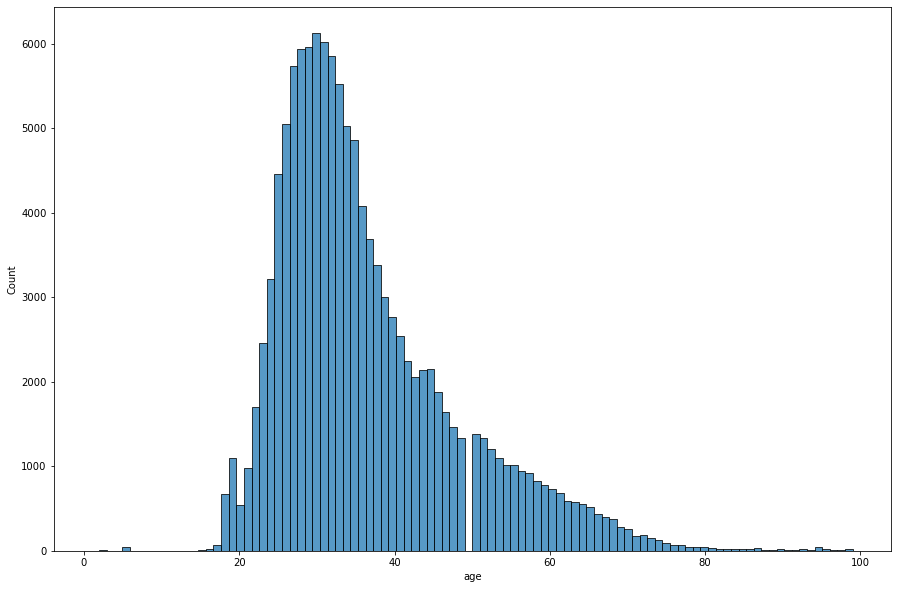

In [13]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(15,10))
#There are many values where age is greater than 100 so we will have to handle these as 100+ yr olds are likely not using AirBnB also 9 year olds
train_df = train_df[train_df['age'] < 100]
data = train_df['age'].sort_values()
sns.histplot(data, ax=axs, bins = 100)
ax_.set_title(f'Train DF Age split')
plt.show()

In [15]:
countries = age_gender_df['country_destination'].unique()
genders = age_gender_df['gender'].unique()
age_bucket = age_gender_df['age_bucket'].unique()
print(countries)
print(genders)
print(age_bucket)

['AU' 'CA' 'DE' 'ES' 'FR' 'GB' 'IT' 'NL' 'PT' 'US']
['male' 'female']
['100+' '95-99' '90-94' '85-89' '80-84' '75-79' '70-74' '65-69' '60-64'
 '55-59' '50-54' '45-49' '40-44' '35-39' '30-34' '25-29' '20-24' '15-19'
 '10-14' '5-9' '0-4']


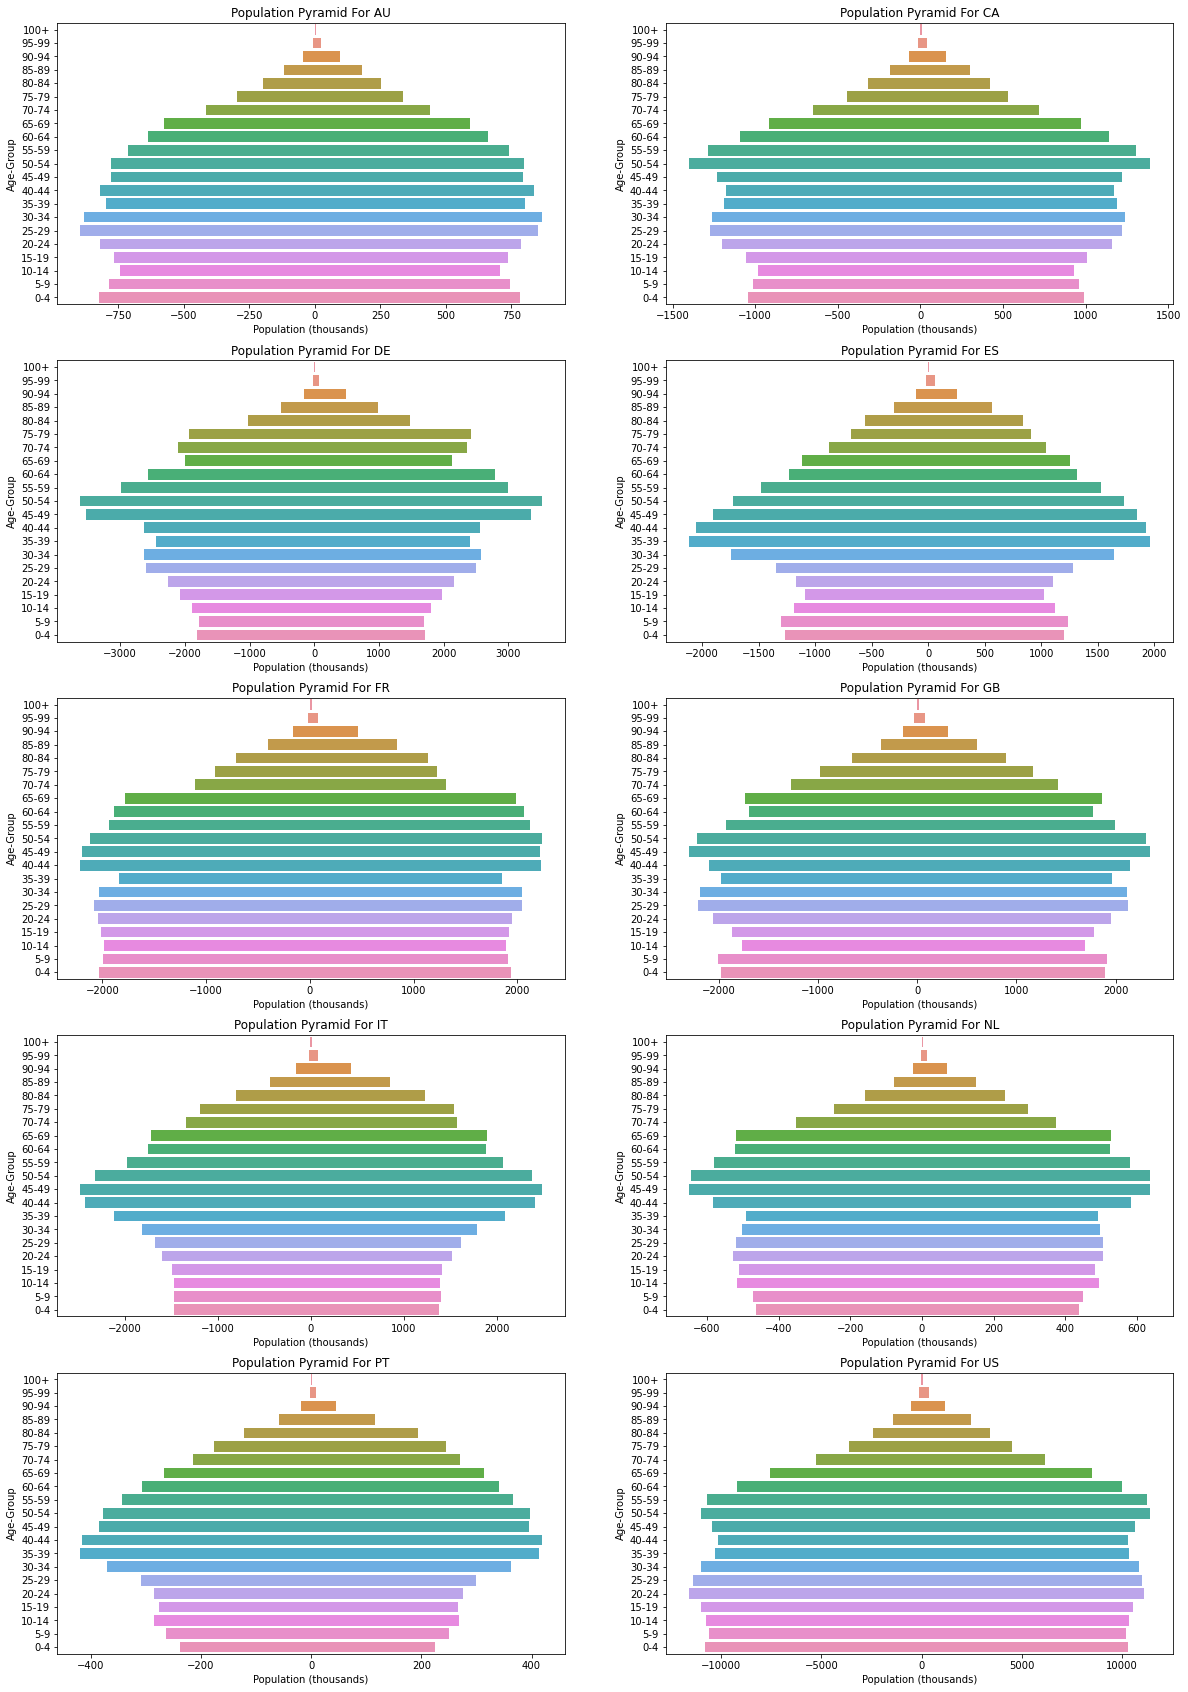

In [16]:
countries = age_gender_df['country_destination'].unique()
fig, axs = plt.subplots(5,2, figsize=(20,30))

for ax_, country in zip(axs.ravel(), countries):
    male_df = age_gender_df[(age_gender_df['gender'] == 'male') & (age_gender_df['country_destination'] == country)]
    m_ages = male_df['age_bucket'].tolist()
    male_pop = male_df['population_in_thousands'].tolist()
    male_pop = [-1*x for x in male_pop]
    m_df = pd.DataFrame({'Age': m_ages,
                        'Male': male_pop})
    bar_plot = sns.barplot(x='Male', y='Age', data=m_df, order=age_bucket, lw=0, ax=ax_)

    female_df = age_gender_df[(age_gender_df['gender'] == 'female') & (age_gender_df['country_destination'] == country)]
    f_ages = female_df['age_bucket'].tolist()
    female_pop = female_df['population_in_thousands'].tolist()
    f_df = pd.DataFrame({'Age': f_ages,
                        'Female': female_pop})
    bar_plot = sns.barplot(x='Female', y='Age', data=f_df, order=age_bucket, lw=0, ax=ax_)
    
    ax_.set(xlabel="Population (thousands)", ylabel="Age-Group", title = f"Population Pyramid For {country}")

plt.show()

In [10]:
age_gender_df = pd.read_csv("..\\data\\raw\\age_gender_bkts.csv")
df_summary(age_gender_df)
age_gender_df.groupby("country_destination").sum()

Entries: 420 | Fields: 5
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB
None
----------------------------------------------
  age_bucket country_destination gender  population_in_thousands    year
0       100+                  AU   male                      1.0  2015.0
1      95-99                  AU   male                      9.0  2015.0
2      90-94                  AU   male                     47.0  2015.0
3      85-89                  AU   male          

,population_in_thousands,year
country_destination,,
AU,23923.0,84630.0
CA,35871.0,84630.0
DE,82562.0,84630.0
ES,47203.0,84630.0
FR,64983.0,84630.0
GB,63840.0,84630.0
IT,61145.0,84630.0
NL,16848.0,84630.0
PT,10609.0,84630.0


Thoughts for development

### Options

- Linear SVC - no inbuilt probability
- SVC - has probability of prediction inbuilt, SVC can also use One-versus-One approach for multiclass classification. Can also alter to the One-versus-Rest [https://scikit-learn.org/stable/modules/svm.html](https://scikit-learn.org/stable/modules/svm.html)
- SGD Classifier - can return confidence scores using the decision_function(x) method. [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function)
- Naive Bayes - can return probability with the predict_proba(X) function [https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
- Ensemble - we can build an ensemble from other models and decide how we want the voting to be organised
- Random forest also has the predict_proba(X) method - [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
- KNeighbours Classifier - also has the predict_proba(X) method - [https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

### Pre-processing steps

- Data cleaning
    - Filling in missing data / Drop them
    - Check for duplicated entries
    - Removing anomalous data points - e.g. age > 120 or < 18 - sci-kit anomly detection
- Data Reduction
    - Dimensionality reduction - PCA
    - Attribute subset selection - do we want to include every piece of data in the model or can we select a subset? - variance selection mentioned by harry
- Data Transformation
    - Feature creation
    - Standardization - mean is 0 - StandardScaler
    - Scaling or normalising
    - Encoding categorical features
    - Potentially encode continuous features with discretization [https://en.wikipedia.org/wiki/Discretization_of_continuous_features](https://en.wikipedia.org/wiki/Discretization_of_continuous_features) , [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer)
- Test train split / cross validation